In [1]:
# import mel spectra
BASE_FOLDER = '../../'
%run -i ..\..\utility\feature_extractor\JupyterLoad_feature_extractor.py


load feature_extractor_mother
load feature_extractor_mel_spectra
load feature_extractor_psd


# Design the hyperparameter on example

(513,)

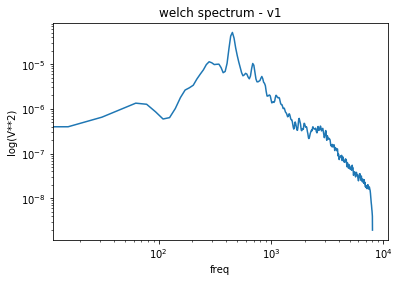

In [2]:
file_path = r'\dataset\6dB\pump\id_00\abnormal\00000004.wav'
fe_psd = feature_extractor_welchPSD(BASE_FOLDER,'v1')
fe_psd.create_from_wav(file_path,0)
fe_psd.set_hyperparamter(nperseg=512, nfft=1024)
fe_psd.plot()
fe_psd.flat_feature().shape

# check run

In [3]:
%run -i ..\..\utility\CleanAextract_to_PandasPickles.py
CleanAextract_to_PandasPickles(base_folder=BASE_FOLDER,
                                   target_folder= r'\dataset\PSD_to_Pandas\data',
                                   FileFindDict = {'SNR': '6dB',
                                                  'machine': 'pump', 
                                                  'ID': ['00']},
                                   FileCountLimit = 5,
                                   CleanerObj = None,
                                   FeatureExtractorObj = fe_psd,
                                   verbose=2,
                                   ).head()

100%|██████████| 10/10 [00:02<00:00,  3.52it/s]


,path,abnormal,ID,file,machine,SNR,welchPSDv1_seg512_ch0
0,\dataset\6dB\pump\id_00\normal\00000000.wav,0,00,00000000,pump,6dB,\dataset\PSD_to_Pandas\data\welchPSDv1_seg512_...
1,\dataset\6dB\pump\id_00\normal\00000001.wav,0,00,00000001,pump,6dB,\dataset\PSD_to_Pandas\data\welchPSDv1_seg512_...
2,\dataset\6dB\pump\id_00\normal\00000002.wav,0,00,00000002,pump,6dB,\dataset\PSD_to_Pandas\data\welchPSDv1_seg512_...
3,\dataset\6dB\pump\id_00\normal\00000003.wav,0,00,00000003,pump,6dB,\dataset\PSD_to_Pandas\data\welchPSDv1_seg512_...
4,\dataset\6dB\pump\id_00\normal\00000004.wav,0,00,00000004,pump,6dB,\dataset\PSD_to_Pandas\data\welchPSDv1_seg512_...


## reload test

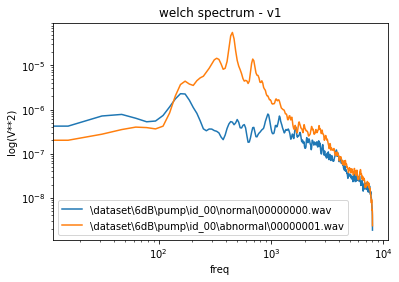

In [4]:
df = pd.read_pickle(r'.\data\FEpandas_welchPSDv1_seg512_ch0.pkl')

fe1 = feature_extractor_from_file(BASE_FOLDER + df.welchPSDv1_seg512_ch0.loc[0],
                                 BASE_FOLDER)

fe2 = feature_extractor_from_file(BASE_FOLDER + df.welchPSDv1_seg512_ch0.loc[6],
                                 BASE_FOLDER)

fe1.plot()
fe2.plot()
plt.legend()

# batch creation

In [6]:
TF = r'\dataset\PSD_to_Pandas\data'
def process_set(FileFindDict):
    df = CleanAextract_to_PandasPickles(base_folder=BASE_FOLDER,
                                   target_folder= TF,
                                   FileFindDict = FileFindDict,
                                   FileCountLimit = None,
                                   CleanerObj = None,
                                   FeatureExtractorObj = fe_psd,
                                   verbose=2,
                                   )
    


#process_set({'SNR': '6dB','machine': 'pump','ID': ['00','02','04','06']}) # 15:12 min - > 33MB
process_set({'SNR': '6dB','machine': 'slider','ID': ['00','02','04','06']})
process_set({'SNR': '6dB','machine': 'fan','ID': ['00','02','04','06']})
process_set({'SNR': '6dB','machine': 'valve','ID': ['00','02','04','06']})
#process_set({'SNR': 'min6dB','machine': 'pump','ID': ['00','02','04','06']})
#process_set({'SNR': 'min6dB','machine': 'vave','ID': ['00','02','04','06']})
#process_set({'SNR': 'min6dB','machine': 'slider','ID': ['00','02','04','06']})
#process_set({'SNR': 'min6dB','machine': 'fan','ID': ['00','02','04','06']})
#process_set({'SNR': '0dB','machine': 'pump','ID': ['00','02','04','06']})
#process_set({'SNR': '0dB','machine': 'vave','ID': ['00','02','04','06']})
#process_set({'SNR': '0dB','machine': 'slider','ID': ['00','02','04','06']})
#process_set({'SNR': '0dB','machine': 'fan','ID': ['00','02','04','06']})



100%|██████████| 4170/4170 [21:47<00:00,  3.19it/s]
